In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from scipy import stats
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
# https://stackoverflow.com/a/37347783/7060068
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000

In [2]:
# Let’s change the default plot size so we have a better view of our line plots:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

## 40 tasks, 5 actions, first-price auction, no-history

In [3]:
# get all names from the folder
# https://stackoverflow.com/a/29206464/7060068
import os

path = '/Users/fan/OneDrive - University of Southampton/My-Projects/Edge-Cloud-Resource-Allocation/marl-edge-cloud/results/5-actions_first-price_no-history_revenue'
dir_list = os.listdir(path)
# print(dir_list)

In [4]:
# read results in .json files
import json

hyperparamter_string = 'lr=0.0001,layers=[256, 256],train_batch_size=3000'

df_results = pd.DataFrame()
results = []
cntr=1
for folder in dir_list:
    file_path = f'{path}/{folder}/result.json'
    if hyperparamter_string not in file_path:  # only consider the specific hyperparameters combination 
        continue
    if not os.path.isfile(file_path):  # jump over useless paths
        continue
    # load data using Python JSON module
#     print(file_path)
    cntr+=1
    with open(file_path) as f:
        # json.loads (and json.load) does not decode multiple json object. So load each line at a time.
        # https://stackoverflow.com/a/29312618/7060068
        for line in f:
            data = json.loads(line)
#             print(data)
#             break
            data_row = data['custom_metrics']

    #         df = pd.DataFrame.from_dict(data, index=0)
            # https://stackoverflow.com/a/17840195/7060068
            df = pd.DataFrame(data_row, index=[data['timesteps_total']])
            results.append(df)

df_results = pd.concat(results, axis=0)
df_results = df_results[['Social Welfare (Online Myopic)_mean', 'Social Welfare_mean', 
                         'Social Welfare (Random Allocation)_mean', 'Social Welfare (All Bidding Zero)_mean']]
print(f"number of trials = {cntr}")
print(len(df_results))
df_results.head(10)

number of trials = 13
736


,Social Welfare (Online Myopic)_mean,Social Welfare_mean,Social Welfare (Random Allocation)_mean,Social Welfare (All Bidding Zero)_mean
3040,8640.773339,8452.264264,6404.284647,8779.088468
6080,8757.684258,8818.979680,6847.340014,9124.108438
9120,8776.057173,9018.008976,7186.703274,9074.174561
12160,8921.955934,9198.982399,7147.907216,9130.218781
15200,8881.442048,9505.368527,7274.711530,8951.847895
18240,8857.494443,9438.173334,7067.435829,9134.341697
21280,8829.096817,9392.309114,6839.936376,8786.955784
24320,8992.114610,9398.029836,7385.281927,8914.514664
27360,9142.477279,10179.966438,7210.894401,8876.344170
30400,9034.594906,10677.754828,7160.168250,9192.313432


In [5]:
# make the number of timesteps as a new column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
df_results_reset = df_results.copy()
df_results_reset = df_results_reset.reset_index(col_fill='timesteps')

In [6]:
# change the name of the first column from `index` to `timesteps`
df_results_reset = df_results_reset.rename(columns={"index": "timesteps", 
                                                   "Social Welfare (Online Myopic)_mean": "Online Myopic",
                                                   "Social Welfare_mean": "MARL",
                                                   "Social Welfare (Random Allocation)_mean": "Random Allocation",
                                                   "Social Welfare (All Bidding Zero)_mean": "All Bidding Zero"}, errors='raise')

In [7]:
df_results_reset.head()

,timesteps,Online Myopic,MARL,Random Allocation,All Bidding Zero
0,3040,8640.773339,8452.264264,6404.284647,8779.088468
1,6080,8757.684258,8818.979680,6847.340014,9124.108438
2,9120,8776.057173,9018.008976,7186.703274,9074.174561
3,12160,8921.955934,9198.982399,7147.907216,9130.218781
4,15200,8881.442048,9505.368527,7274.711530,8951.847895


In [8]:
# make a dataframe for plotting several lines in one figure
# https://stackoverflow.com/a/55579762/7060068

df_results_preproc = pd.melt(df_results_reset, ['timesteps'], var_name='algorithms',
                            value_name='mean social welfare')

In [9]:
df_results_preproc.head()
# df_results_preproc

,timesteps,algorithms,mean social welfare
0,3040,Online Myopic,8640.773339
1,6080,Online Myopic,8757.684258
2,9120,Online Myopic,8776.057173
3,12160,Online Myopic,8921.955934
4,15200,Online Myopic,8881.442048


### lr=0.0001,layers=[256, 256],train_batch_size=3000

(0.0, 20448.766445919027)

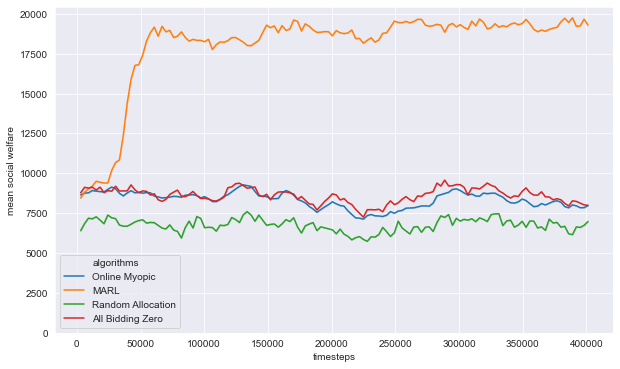

In [10]:
# plot the results all in one figure
# https://stackoverflow.com/a/55579762/7060068
p = sns.lineplot(x='timesteps', y='mean social welfare', hue='algorithms', 
                 data=df_results_preproc)  # 2 actions (blue)
p.axes.set_ylim(0)

In [11]:
1/0

ZeroDivisionError: division by zero

## 40 tasks, 5 actions, second-price auction, no-history

In [12]:
# get all names from the folder
# https://stackoverflow.com/a/29206464/7060068
import os

path = '/Users/fan/OneDrive - University of Southampton/My-Projects/Edge-Cloud-Resource-Allocation/marl-edge-cloud/results/5-actions_second-price_no-history_revenue'
dir_list = os.listdir(path)
# print(dir_list)

In [13]:
# read results in .json files
import json

hyperparamter_string = 'lr=0.0001,layers=[256, 256],train_batch_size=3000'

df_results = pd.DataFrame()
results = []
for folder in dir_list:
    file_path = f'{path}/{folder}/result.json'
    if hyperparamter_string not in file_path:  # only consider the specific hyperparameters combination 
        continue
    if not os.path.isfile(file_path):  # jump over useless paths
        continue
    # load data using Python JSON module
#     print(file_path)
    with open(file_path) as f:
        # json.loads (and json.load) does not decode multiple json object. So load each line at a time.
        # https://stackoverflow.com/a/29312618/7060068
        for line in f:
            data = json.loads(line)
#             print(data)
#             break
            data_row = data['custom_metrics']

    #         df = pd.DataFrame.from_dict(data, index=0)
            # https://stackoverflow.com/a/17840195/7060068
            df = pd.DataFrame(data_row, index=[data['timesteps_total']])
            results.append(df)

df_results = pd.concat(results, axis=0)
df_results = df_results[['Social Welfare (Online Myopic)_mean', 'Social Welfare_mean', 
                         'Social Welfare (Random Allocation)_mean', 'Social Welfare (All Bidding Zero)_mean']]
print(len(df_results))
df_results.head(10)

655


,Social Welfare (Online Myopic)_mean,Social Welfare_mean,Social Welfare (Random Allocation)_mean,Social Welfare (All Bidding Zero)_mean
3040,8640.773339,8452.264264,6404.284647,8779.088468
6080,8757.684258,8805.344592,6947.747288,8989.756090
9120,8776.057173,8817.235200,7196.662877,9021.143098
12160,8921.955934,9172.658908,7601.341139,9132.610963
15200,8881.442048,9489.403029,7369.439795,9122.241496
18240,8857.494443,9239.374862,7433.993057,9105.549611
21280,8829.096817,9182.749451,7073.002278,8762.774168
24320,8992.114610,9457.702548,7353.907921,8948.613489
27360,9142.477279,10161.631379,7343.150500,9202.254750
30400,9034.594906,10397.998789,6837.179562,9172.349845


In [14]:
# make the number of timesteps as a new column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
df_results_reset = df_results.copy()
df_results_reset = df_results_reset.reset_index(col_fill='timesteps')

In [15]:
# change the name of the first column from `index` to `timesteps`
df_results_reset = df_results_reset.rename(columns={"index": "timesteps", 
                                                   "Social Welfare (Online Myopic)_mean": "Online Myopic",
                                                   "Social Welfare_mean": "MARL",
                                                   "Social Welfare (Random Allocation)_mean": "Random Allocation",
                                                   "Social Welfare (All Bidding Zero)_mean": "All Bidding Zero"}, errors='raise')

In [16]:
df_results_reset.head()

,timesteps,Online Myopic,MARL,Random Allocation,All Bidding Zero
0,3040,8640.773339,8452.264264,6404.284647,8779.088468
1,6080,8757.684258,8805.344592,6947.747288,8989.756090
2,9120,8776.057173,8817.235200,7196.662877,9021.143098
3,12160,8921.955934,9172.658908,7601.341139,9132.610963
4,15200,8881.442048,9489.403029,7369.439795,9122.241496


In [17]:
# make a dataframe for plotting several lines in one figure
# https://stackoverflow.com/a/55579762/7060068

df_results_preproc = pd.melt(df_results_reset, ['timesteps'], var_name='algorithms',
                            value_name='mean social welfare')

In [18]:
df_results_preproc.head()

,timesteps,algorithms,mean social welfare
0,3040,Online Myopic,8640.773339
1,6080,Online Myopic,8757.684258
2,9120,Online Myopic,8776.057173
3,12160,Online Myopic,8921.955934
4,15200,Online Myopic,8881.442048


(0.0, 21359.901528818955)

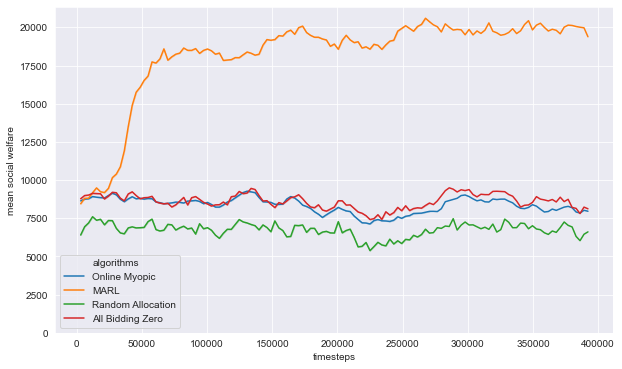

In [19]:
# plot the results all in one figure
# https://stackoverflow.com/a/55579762/7060068
p = sns.lineplot(x='timesteps', y='mean social welfare', hue='algorithms', 
                 data=df_results_preproc)  # 2 actions (blue)
p.axes.set_ylim(0)

In [20]:
1/0

ZeroDivisionError: division by zero

## 40 tasks, 5 actions, first-price auction, with-history

In [21]:
# get all names from the folder
# https://stackoverflow.com/a/29206464/7060068
import os

path = '/Users/fan/OneDrive - University of Southampton/My-Projects/Edge-Cloud-Resource-Allocation/marl-edge-cloud/results/5-actions_first-price_with-history_revenue'
dir_list = os.listdir(path)
# print(dir_list)

In [22]:
# read results in .json files
import json

hyperparamter_string = 'lr=0.0001,layers=[256, 256],train_batch_size=3000'

df_results = pd.DataFrame()
results = []
for folder in dir_list:
    file_path = f'{path}/{folder}/result.json'
    if hyperparamter_string not in file_path:  # only consider the specific hyperparameters combination 
        continue
    if not os.path.isfile(file_path):  # jump over useless paths
        continue
    # load data using Python JSON module
#     print(file_path)
    with open(file_path) as f:
        # json.loads (and json.load) does not decode multiple json object. So load each line at a time.
        # https://stackoverflow.com/a/29312618/7060068
        for line in f:
            data = json.loads(line)
#             print(data)
#             break
            data_row = data['custom_metrics']

    #         df = pd.DataFrame.from_dict(data, index=0)
            # https://stackoverflow.com/a/17840195/7060068
            df = pd.DataFrame(data_row, index=[data['timesteps_total']])
            results.append(df)

df_results = pd.concat(results, axis=0)
df_results = df_results[['Social Welfare (Online Myopic)_mean', 'Social Welfare_mean', 
                         'Social Welfare (Random Allocation)_mean', 'Social Welfare (All Bidding Zero)_mean']]
print(len(df_results))
df_results.head(10)

586


,Social Welfare (Online Myopic)_mean,Social Welfare_mean,Social Welfare (Random Allocation)_mean,Social Welfare (All Bidding Zero)_mean
3040,8640.773339,8462.391497,6492.509254,8599.240576
6080,8757.684258,8593.301367,7253.360639,8886.890743
9120,8776.057173,8934.016218,7123.834885,9062.584631
12160,8921.955934,8919.788484,6642.982766,9245.420362
15200,8881.442048,9114.418362,6575.005541,9063.297978
18240,8857.494443,9136.872559,7071.745767,8985.889501
21280,8829.096817,9017.794019,6719.019957,8785.241327
24320,8992.114610,9151.091319,7394.897050,8576.451693
27360,9142.477279,9541.092628,7430.186368,8980.617244
30400,9034.594906,9483.944557,6992.234351,9010.037771


In [23]:
# make the number of timesteps as a new column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
df_results_reset = df_results.copy()
df_results_reset = df_results_reset.reset_index(col_fill='timesteps')

In [24]:
# change the name of the first column from `index` to `timesteps`
df_results_reset = df_results_reset.rename(columns={"index": "timesteps", 
                                                   "Social Welfare (Online Myopic)_mean": "Online Myopic",
                                                   "Social Welfare_mean": "MARL",
                                                   "Social Welfare (Random Allocation)_mean": "Random Allocation",
                                                   "Social Welfare (All Bidding Zero)_mean": "All Bidding Zero"}, errors='raise')

In [25]:
df_results_reset.head()

,timesteps,Online Myopic,MARL,Random Allocation,All Bidding Zero
0,3040,8640.773339,8462.391497,6492.509254,8599.240576
1,6080,8757.684258,8593.301367,7253.360639,8886.890743
2,9120,8776.057173,8934.016218,7123.834885,9062.584631
3,12160,8921.955934,8919.788484,6642.982766,9245.420362
4,15200,8881.442048,9114.418362,6575.005541,9063.297978


In [26]:
# make a dataframe for plotting several lines in one figure
# https://stackoverflow.com/a/55579762/7060068

df_results_preproc = pd.melt(df_results_reset, ['timesteps'], var_name='algorithms',
                            value_name='mean social welfare')

In [27]:
df_results_preproc.head()

,timesteps,algorithms,mean social welfare
0,3040,Online Myopic,8640.773339
1,6080,Online Myopic,8757.684258
2,9120,Online Myopic,8776.057173
3,12160,Online Myopic,8921.955934
4,15200,Online Myopic,8881.442048


(0.0, 19995.47805837643)

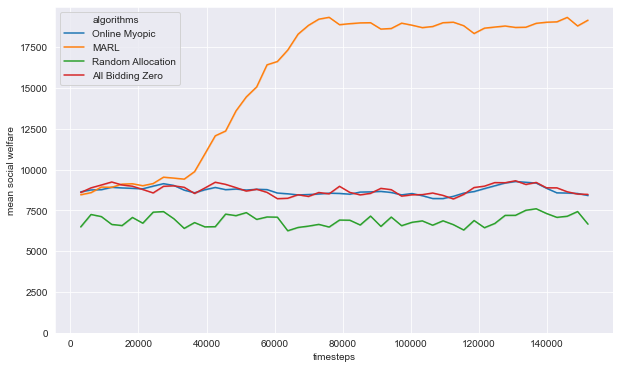

In [28]:
# plot the results all in one figure
# https://stackoverflow.com/a/55579762/7060068
p = sns.lineplot(x='timesteps', y='mean social welfare', hue='algorithms', 
                 data=df_results_preproc)  # 2 actions (blue)
p.axes.set_ylim(0)

In [20]:
1/0

ZeroDivisionError: division by zero

### Online Myopic

In [ ]:
# plot the confidence interval for the mean
# https://stackoverflow.com/a/44941463/7060068

p = sns.lineplot(x=df_results.index, y='Social Welfare (Online Myopic)_mean', data=df_results)  # 2 actions (blue)
p.set_xlabel("Timesteps", fontsize = 14)
p.set_ylabel("Mean Social Welfare", fontsize = 14)
# https://stackoverflow.com/a/57101557/7060068
p.axes.set_ylim(0)

### All Bidding Zero

In [ ]:
p = sns.lineplot(x=df_results.index, y='Social Welfare (All Bidding Zero)_mean', data=df_results)  # 2 actions (blue)
p.set_xlabel("Timesteps", fontsize = 14)
p.set_ylabel("Mean Social Welfare", fontsize = 14)
p.axes.set_ylim(0)

### MARL

In [ ]:
p = sns.lineplot(x=df_results.index, y='Social Welfare_mean', data=df_results)  # 2 actions (blue)
p.set_xlabel("Timesteps", fontsize = 14)
p.set_ylabel("Mean Social Welfare", fontsize = 14)
p.axes.set_ylim(0)

### Random Allocation

In [ ]:
p = sns.lineplot(x=df_results.index, y='Social Welfare (Random Allocation)_mean', data=df_results)  # 2 actions (blue)
p.set_xlabel("Timesteps", fontsize = 14)
p.set_ylabel("Mean Social Welfare", fontsize = 14)
p.axes.set_ylim(0)

In [ ]:
1/0

## Use data from the progress.csv file.

In [ ]:
# load from file
# https://thispointer.com/python-three-ways-to-check-if-a-file-is-empty/
# concatenating df1 and df2 along rows
# vertical_concat = pd.concat([df1, df2], axis=0)
# https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/
hyperparamter_string = 'lr=0.0001,train_batch_size=3000'
df_results = pd.DataFrame()
for folder in dir_list:
    file_path = f'{path}/{folder}/progress.csv'
    if not os.path.isfile(file_path):  # jump over useless paths
        continue
    if hyperparamter_string not in file_path:  # only consider the specific hyperparameters combination 
        continue
    with open (file_path) as f:
        if os.stat(file_path).st_size != 0:
            df_f = pd.read_csv(f)
            if df_results.empty:
                df_results = df_f
            else:
                df_results = df_results.append(df_f, ignore_index = True)

In [ ]:
print(len(df_results))
df_results.head()

In [ ]:
df_results1 = df_results

In [ ]:
path = '/Users/fan/OneDrive - University of Southampton/My-Projects/Edge-Cloud-Resource-Allocation/marl-edge-cloud/results/edge_cloud_independent_ppo_with_history_2_actions'
dir_list = os.listdir(path)
hyperparamter_string = 'lr=0.0001,train_batch_size=3000'
df_results = pd.DataFrame()
for folder in dir_list:
    file_path = f'{path}/{folder}/progress.csv'
    if not os.path.isfile(file_path):  # jump over useless paths
        continue
    if hyperparamter_string not in file_path:  # only consider the specific hyperparameters combination 
        continue
    with open (file_path) as f:
        if os.stat(file_path).st_size != 0:
            df_f = pd.read_csv(f)
            if df_results.empty:
                df_results = df_f
            else:
                df_results = df_results.append(df_f, ignore_index = True)

In [ ]:
# plot the confidence interval for the mean
# dont't have customised measurements in the progress.csv file, maybe we need to get data from the *.json file.
sns.lineplot(x='timesteps_total',y='episode_reward_mean', data=df_results)  # 2 actions (blue)
# sns.lineplot(x='timesteps_total',y='episode_reward_mean', data=df_results1)  # 5 actions (yellow)

In [ ]:
# test if some file is missing
oo = {}
NoT = 40 # number of tasks in the whole time period
NoS = 60 # number of samples
for F in [8.0]:
    for k in [0.35, 0.4, 0.45]:
        for i in range(30,NoS):
            f = open('simulation_results_ILP\\s2(sw)'
                                                 +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
           
            f.close()

In [ ]:
# print the value of the file
NoT = 20 # number of tasks in the whole time period
NoS = 23 # number of samples
F = 8.0
k = 0.35


f = open('simulation_results_ILP\\fog(tm)'
                                                 +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
csv_f = csv.reader(f)
for row in csv_f:
    print(float(row[0]))
f.close()

In [ ]:
# get the data
oo = {}
NoT = 20 # number of tasks in the whole time period
NoS = 100 # number of samples
for F in [8.0]:
    for k in [0.35, 0.4, 0.45]:
        for i in range(NoS):
            f = open('simulation_results_ILP\\oo(sw)'
                                                 +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
            csv_f = csv.reader(f)
            for row in csv_f:
                oo['sw', NoT, k, F, i] = float(row[0])
            f.close()

# s2 = {}
# NoT = 20
# NoS = 100 # number of samples
# for F in [8.0]:
#     for k in [0.35, 0.4, 0.45]:
#         for i in range(1,NoS+1):
#             f = open('simulation_results_ILP\s2(sw)'
#                                                  +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
#             csv_f = csv.reader(f)
#             for row in csv_f:
#                 s2['sw', NoT, k, F, i] = float(row[0])
#             f.close()

og = {}
NoT = 20
NoS = 100 # number of samples
for F in [8.0]:
    for k in [0.35, 0.4, 0.45]:
        for i in range(NoS):
            f = open('simulation_results_ILP/og(sw)'
                                                 +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
            csv_f = csv.reader(f)
            for row in csv_f:
                og['sw', NoT, k, F, i] = float(row[0])
            f.close()
            
fog = {}
NoT = 20
NoS = 100 # number of samples
for F in [8.0]:
    for k in [0.35, 0.4, 0.45]:
        for i in range(NoS):
            f = open('simulation_results_ILP/fog(sw)' 
                                                 +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
            csv_f = csv.reader(f)
            for row in csv_f:
                fog['sw', NoT, k, F, i] = float(row[0])
            f.close()

In [ ]:
# whe F = 8 construct a dataframe
d = {}
F = 8.0
NoT = 20

for k in [0.35, 0.4, 0.45]:
    d[k] = [oo['sw', NoT, k, F, i] for i in range(10)]
result_oo = pd.DataFrame(data=d)
# print(result_oo)
# for k in [0.35, 0.4, 0.45]:
#     d[k] = [s2['sw', NoT, k, F, i] for i in range(10)]
# result_s2 = pd.DataFrame(data=d)

# online greedy：
for k in [0.35, 0.4, 0.45]:
    d[k] = [og['sw', NoT, k, F, i] for i in range(10)]
result_og = pd.DataFrame(data=d)

# online greedy：
for k in [0.35, 0.4, 0.45]:
    d[k] = [fog['sw', NoT, k, F, i] for i in range(10)]
result_fog = pd.DataFrame(data=d)

In [ ]:
result_oo.head()
result_fog.head()

In [ ]:
mean_oo = result_oo.mean(axis = 0)
# pd.DataFrame.std: Return sample standard deviation
std_oo = result_oo.std(axis = 0)  

mean_og = result_og.mean(axis = 0)
# pd.DataFrame.std: Return sample standard deviation
std_og = result_og.std(axis = 0)  

mean_fog = result_fog.mean(axis = 0)
# pd.DataFrame.std: Return sample standard deviation
std_fog = result_fog.std(axis = 0)  

In [ ]:
stats.t.ppf(1-0.025, NoS -1)

In [ ]:
# Degrees of Freedom = n – 1, 
plt.errorbar(mean_oo.index, mean_oo, xerr = 0, 
             yerr = std_oo / np.sqrt(NoS) * stats.t.ppf(1-0.025, NoS -1), uplims =True, lolims = True)
plt.errorbar(mean_og.index, mean_og, xerr = 0, 
             yerr = std_og / np.sqrt(NoS) * stats.t.ppf(1-0.025, NoS -1), uplims =True, lolims = True)
plt.errorbar(mean_fog.index, mean_fog, xerr = 0, 
             yerr = std_fog / np.sqrt(NoS) * stats.t.ppf(1-0.025, NoS -1), uplims =True, lolims = True)

# plt.errorbar(mean_sp.index, mean_sp, xerr = 0, yerr = std_sp * 2.024, uplims =True, lolims = True)
# plt.errorbar(mean_ogwf.index, mean_ogwf, xerr = 0, yerr = std_ogwf * 2.201, uplims =True, lolims = True)

# plt.legend(['offline optimal','online greedy','SWMOA', 'flexible online greedy'], loc = 'lower right')
plt.legend(['offline optimal','online greedy','flexible online greedy'],
           loc = 'lower right')
plt.xlabel("resource coefficient")
plt.ylabel("social welfare")

# setting y axis limit
axes = plt.gca()
# axes.set_ylim([0,150])

plt.show
# plt.savefig('comparison of four algorithms.png')

In [ ]:
figure = result_oo.boxplot(column = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6], grid = False)
figure

In [ ]:
result_ogf = pd.read_csv("ogf.csv", names =[0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
result_ogf

In [ ]:
figure = result_ogf.boxplot(column = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6], grid = False)
figure